# ANOVA

* A Statistical test to evaluate if a variable's distribution differs across the target classes.

* A univariate test, Linear model for testing the individual effect of each of features with target.

* ANOVA assumes a linear relationship between the features and the target, and also that the variables are normally distributed.

* Makes assumptions over the data. If assumptions are not met, consider [variance stabilizing transformations](https://www.blog.trainindata.com/variance-stabilizing-transformations-in-machine-learning/).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif

# to select features
from sklearn.feature_selection import SelectKBest

## Classification

In [5]:
# load dataset
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [6]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## ANOVA

In [8]:
# the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223342e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23456221e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

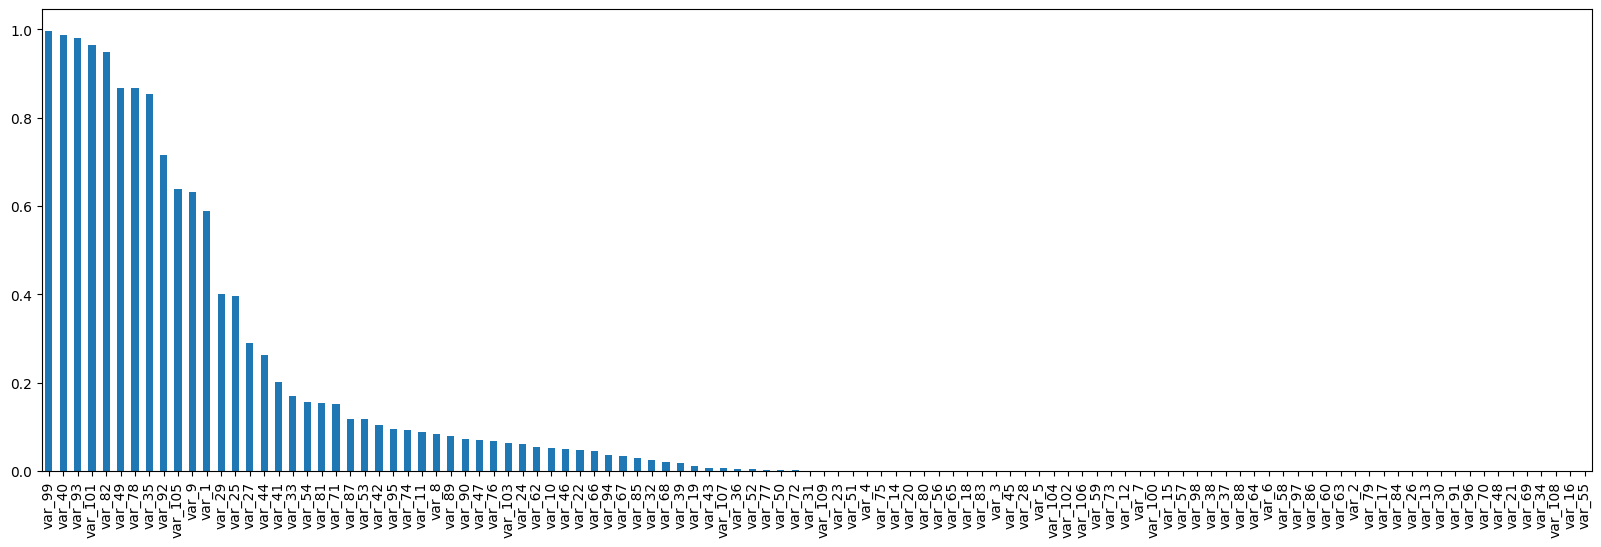

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.show()

* **The smaller the p_value the more predictive the feature is.**

* Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

### Select top 10 features based of univariate anova

In [10]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [11]:
# remove unwanted features from the dataset

X_train = sel_.transform(X_train)
X_ttest = sel_.transform(X_test)

X_train.shape

(35000, 10)